In [47]:
using Plots
using Distributions
#using SpecialFunctions
#using KernelDensity
using Base
using LaTeXStrings
using JLD2
plot();

In [3]:
Exit(;a=-2,b=2,x=0,Δ=0.01)=begin
    x
    it=0

    while a<x<b
        it+=1
        x+=rand(Normal())*√Δ
    end
    return it*Δ, b<=x
end

Exit (generic function with 1 method)

In [4]:
temp(x;n=1e3,typ=1,a=0,b=1,Δ=0.01)=mean(Exit(a=a,b=b,x=x,Δ=Δ)[typ] for i in 1:n)

temp (generic function with 1 method)

In [6]:
X=0:0.01:1

0.0:0.01:1.0

In [9]:
Y=zeros(length(X));

In [ ]:
t=time()
wyn=Any[i for i in 1:length(Temp)]
for i in 0:3
    Threads.@threads for a in 1:Threads.nthreads()
        wyn[15*i+a]=["L=$L/T=$(Temp[15*i+a])",f_time(L=L, Times=Int(2.5*10^6),T=Temp[15*i+a])]
    end
end
for i in wyn
    file[i[1]] = i[2]
end
time()-t

In [35]:
n=1e5
Δ=1e-4

0.0001

In [36]:
t=time()
Threads.@threads for i in 1:101
    Y[i]=temp(X[i],n=n,Δ=Δ)
end
time()-t

21.28499984741211

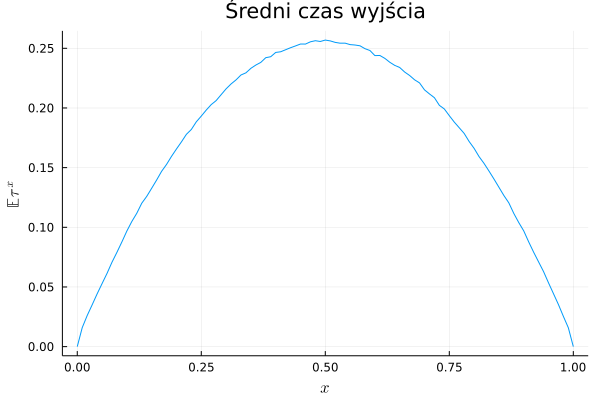

In [66]:
plot(X,Y, leg=false, ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")

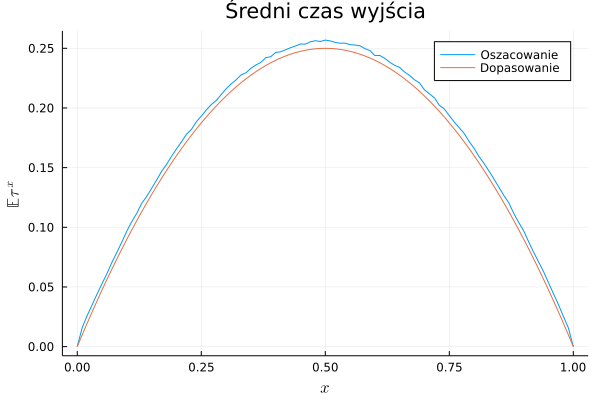

In [93]:
plot(X,Y, label="Oszacowanie", ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")
plot!(X,x->-x*(x-1), label="Dopasowanie")

In [80]:
savefig(plot!(dpi=200),"../fig/plot/exp_val.pdf")

In [102]:
X=LinRange(0,1,100)

100-element LinRange{Float64, Int64}:
 0.0,0.010101,0.020202,0.030303,0.040404,…,0.969697,0.979798,0.989899,1.0

In [103]:
Z=zeros(length(X));

In [108]:
t=time()
Threads.@threads for i in 1:100
    Z[i]=temp(X[i],n=1e4,Δ=1e-3, typ=2)
end
time()-t

0.24899983406066895

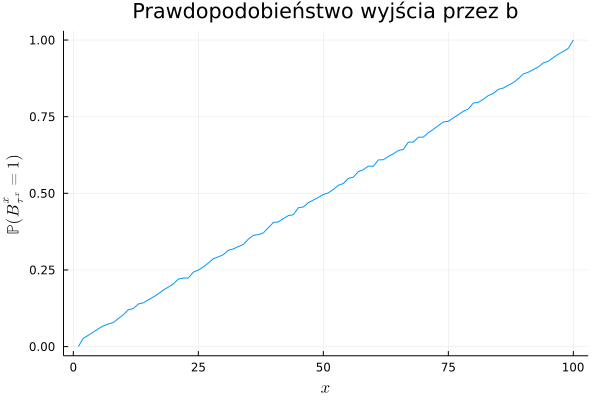

In [115]:
plot(Z, leg=false, xlabel=L"$x$", ylabel=L"$\mathbb{P}(B^x_{\tau^x}=1)$", title="Prawdopodobieństwo wyjścia przez b")

# Ostateczne 

In [125]:
temp(x;n=1e3,a=0,b=1,Δ=0.01)=begin
    res=[Exit(a=a,b=b,x=x,Δ=Δ) for i in 1:n]
    mean(res[i][1] for i in 1:Int(n)),mean(res[i][2] for i in 1:Int(n))
end

temp (generic function with 1 method)

In [150]:
g=temp.(X);

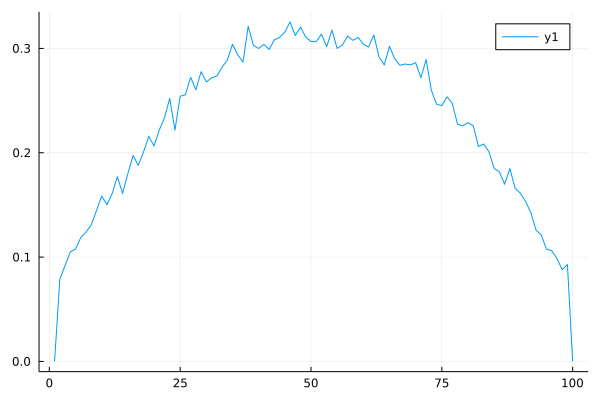

In [156]:
plot([g[i][1] for i in 1:100])

In [162]:
File=jldopen("dane.jld2","w")

JLDFile D:\GitHub\Symulacje\Sprawko_2\Zad 2\dane.jld2 (read/write)
  (no datasets)

In [198]:
n=1e6
Δ=1e-5

1.0e-5

In [199]:
t=time()
X=LinRange(0,1,100)
Z=zeros(100)
Y=zeros(100)
Threads.@threads for i in 1:100
    res=temp(X[i],n=n,Δ=Δ)
    Y[i]=res[1]
    Z[i]=res[2]
end
time()-t

2105.537999868393

In [200]:
File["P"]=Z
File["E"]=Y

100-element Vector{Float64}:
 0.0
 0.011820737319992187
 0.021678745989986002
 0.031263645799985605
 0.0402931935799886
 0.04974336461999113
 0.05885458463999075
 0.06757566193999051
 0.07599694564999049
 0.08468000207999225
 0.09259806363999647
 0.10083780645999758
 0.1083224122899981
 ⋮
 0.10073955680999719
 0.09232743303998946
 0.08450815599999707
 0.07584873056999167
 0.06749781950999237
 0.05861444343999025
 0.04993189565999128
 0.04083495280998657
 0.03129236347998666
 0.021736511159986583
 0.01185311201999319
 0.0

In [201]:
using Dates

In [202]:
Hour(DateTime(now()))<Hour(3)

false

In [203]:
t=time()
i=1
while Hour(DateTime(now()))<Hour(3)
    X1=LinRange(0,1,100)
    Z1=zeros(100)
    Y1=zeros(100)
    Threads.@threads for i in 1:100
        res=temp(X1[i],n=n,Δ=Δ)
        Y1[i]=res[1]
        Z1[i]=res[2]
    end
    File["P$i"]=Z1
    File["E$i"]=Y1
end
time()-t, DateTime(now())

(0.018000125885009766, DateTime("2022-06-26T03:25:57.048"))

In [204]:
close(File)

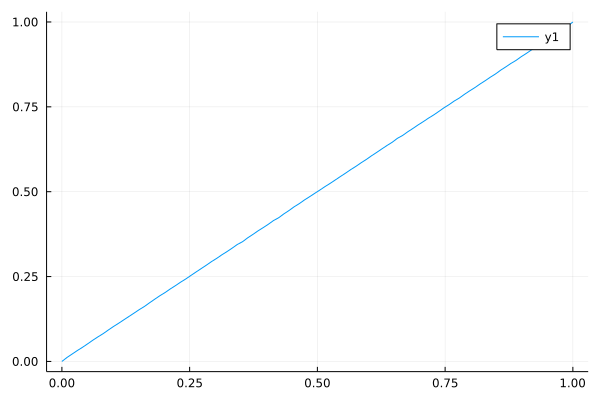

In [206]:
plot(X,Z)

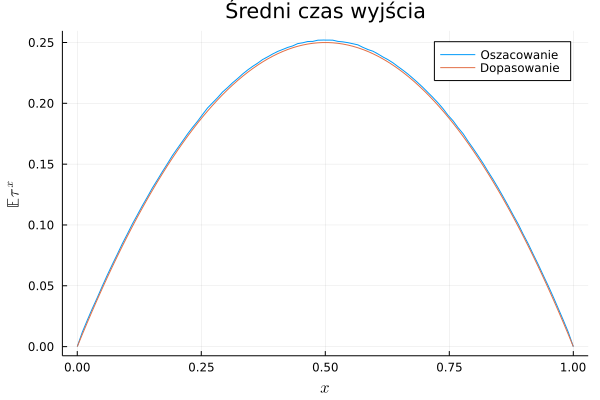

In [207]:
plot(X,Y, label="Oszacowanie", ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")
plot!(X,x->-x*(x-1), label="Dopasowanie")

In [209]:
using CurveFit

In [261]:
param=poly_fit(X,Y,2)

3-element Vector{Float64}:
  0.0016089803313592776
  1.0012344023525823
 -1.0012693964797201

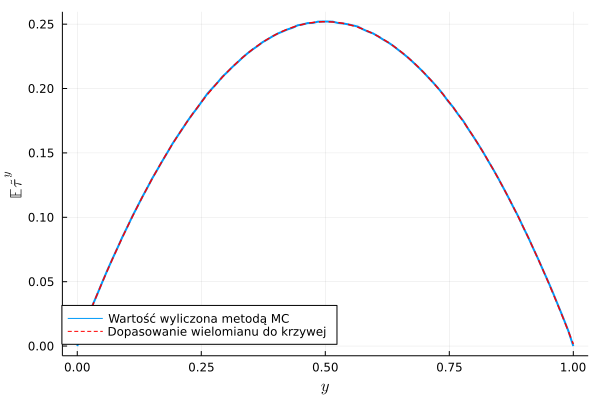

In [269]:
plot(X,Y, label="Wartość wyliczona metodą MC", ylabel=L"$\mathbb{E}\widetilde\tau^y$", xlabel=L"$y$",linewidth=2)
plot!(X,x->param[3]*x^2+param[2]*x+param[1], label="Dopasowanie wielomianu do krzywej", leg=:bottom, linewidth=1.5, linestyle=:dash, color=:red)

In [270]:
savefig(plot!(dpi=200),"../fig/plot/expect_val.pdf")

In [ ]:
plot(Z, leg=false, xlabel=L"$x$", ylabel=L"$\mathbb{P}(B^x_{\tau^x}=1)$", title="Prawdopodobieństwo wyjścia przez b")

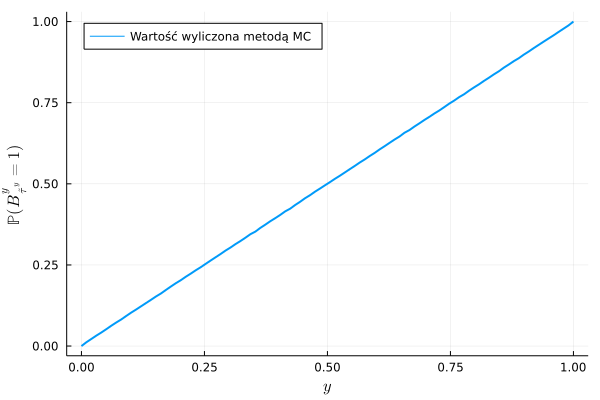

In [267]:
plot(X,Z, label="Wartość wyliczona metodą MC", xlabel=L"$y$", ylabel=L"$\mathbb{P}(B^y_{\widetilde\tau^y}=1)$",linewidth=2)
plot!(leg=:topleft)
#plot!(X,x->param[3]*x^2+param[2]*x+param[1], label="Dopasowanie wielomianu do krzywej", leg=:bottom, linewidth=1.5, linestyle=:dash, color=:red)

In [268]:
savefig(plot!(dpi=200),"../fig/plot/prob.pdf")

# TEST

In [69]:
TEST=jldopen("test_plot.jld2","w")

JLDFile D:\GitHub\Symulacje\Sprawko_2\Zad 2\test_plot.jld2 (read/write)
  (no datasets)

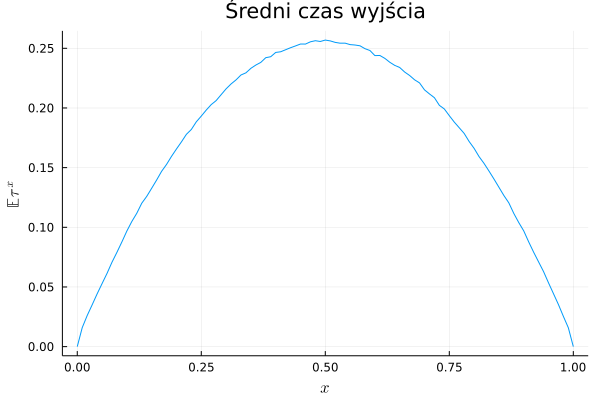

In [70]:
TEST["exp_val_plot"]=plot(X,Y, label="cos", leg=false, ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")

In [71]:
close(TEST)

In [72]:
TEST=jldopen("test_plot.jld2","r")

JLDFile D:\GitHub\Symulacje\Sprawko_2\Zad 2\test_plot.jld2 (read-only)
 └─🔢 exp_val_plot

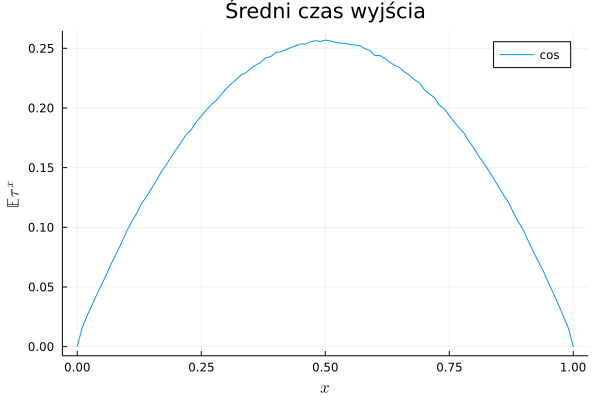

In [73]:
plot!(TEST["exp_val_plot"], leg=true)

In [74]:
close(TEST)